### Implementasi multinomial naive bayes

In [1]:
#library yang dipakai
import re    
import nltk  
import string 
import warnings 
import numpy as np 
import pandas as pd 
import ast
import seaborn as sns 
import matplotlib.pyplot as plt  

from sklearn.model_selection import KFold,cross_val_score

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.tokenize.toktok import ToktokTokenizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


# Import Tf-idf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Import the train test split
from sklearn.model_selection import train_test_split

# To evaluate our model
#from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve, auc,roc_auc_score

pd.set_option("display.max_colwidth", 100) 
warnings.filterwarnings("ignore") 

%matplotlib inline

### Input Data

In [2]:
df=pd.read_csv("labeled-sudah.csv", sep=';')

In [3]:
df.head (10) #menampilkan beberapa data pertama

,Tweet,tidy_text,sentimen
0,Menyejukkan luar biasa tapi bagi pembenci Anies Baswedan ini adalah pukulan telak atas mereka yg...,sejuk luar biasa benci anies baswedan pukul telak atas jegal anies baswedan maju pilpres insyaal...,-1.0
1,Repost dari Kebakaran terjadi di Gang Lapo Sona Kelurahan Baringin Kota Sibolga Sumatera Utara,repost bakar jadi gang lapo sona lurah baringin kota sibolga sumatera utara,-1.0
2,Kasihan Kadrun yah partai nya sudah mau tahun engga dapet jabatan Menteri makanya kadrun sangat ...,kasihan kadrun partai tahun engga dapet jabat menteri makanya kadrun sangat menderitananti kadru...,-1.0
3,Repost dari Bantuan gerobak gratis dari Partai Perindo berdampak langsung meningkatkan perekonom...,repost bantu gerobak gratis partai perindo dampak langsung tingkat ekonomi warga,1.0
4,wy Pemimpin Muda Inovatif dan Kreatif di dukung penuh generasi milenial Pemimpin muda yang punya...,pimpin muda inovatif kreatif dukung penuh generasi milenial pimpin muda punya banyak inovasi maj...,1.0
5,Simpatisan Jokowi di Ponorogo mendeklarasikan dukungan untuk Prabowo Subianto pada Pilpres Gerin...,simpatisan jokowi ponorogo deklarasi dukung prabowo subianto pilpres gerindra yakin prabowo mena...,1.0
6,Dulu WORLD surveyjika pilpres dilakukan sekarang maka pemenangnyaAnies Baswedan Itu dulu bbrp bu...,dulu world surveyjika pilpres laku sekarang pemenangnyaanies baswedan dulu bbrp bulan yllsekaran...,1.0
7,Mahkamah Konstitusi Jadi Wasit yang Adil Tangani Sengketa Pemilu Kami sangat berharap MK melakuk...,mahkamah konstitusi jadi wasit adil tangan sengketa milu sangat harap laku siap matang jadi wasi...,1.0
8,Bersama Berkolaborasi dan Bersinergi untuk Memenangkan Ganjar Pranowo dalam Pilpres,sama kolaborasi sinergi menang ganjar pranowo pilpres,1.0
9,PKB Pingit Cak Imin untuk Setop Bicara soal Pilpres,pingit imin setop bicara soal pilpres,-1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 709 entries, 0 to 708
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Tweet      578 non-null    object 
 1   tidy_text  578 non-null    object 
 2   sentimen   578 non-null    float64
dtypes: float64(1), object(2)
memory usage: 16.7+ KB


In [5]:
df.dropna(inplace=True) #menghapus data kosong

In [6]:
df['sentimen'] = df['sentimen'].astype(int) #merubah tipe data dari kolom sentimen menjadi integer atau bilangan asli (bukan desimal)

In [7]:
# df.to_csv("adianalysis.csv")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 578 entries, 0 to 708
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Tweet      578 non-null    object
 1   tidy_text  578 non-null    object
 2   sentimen   578 non-null    int32 
dtypes: int32(1), object(2)
memory usage: 15.8+ KB


In [9]:
columns_to_drop = ['tidy_text'] #menghapus kolom tidy_text karena yang dipakai adalah kolom Tweet
df.drop(columns=columns_to_drop, inplace=True)

In [10]:
df.head(10)

,Tweet,sentimen
0,Menyejukkan luar biasa tapi bagi pembenci Anies Baswedan ini adalah pukulan telak atas mereka yg...,-1
1,Repost dari Kebakaran terjadi di Gang Lapo Sona Kelurahan Baringin Kota Sibolga Sumatera Utara,-1
2,Kasihan Kadrun yah partai nya sudah mau tahun engga dapet jabatan Menteri makanya kadrun sangat ...,-1
3,Repost dari Bantuan gerobak gratis dari Partai Perindo berdampak langsung meningkatkan perekonom...,1
4,wy Pemimpin Muda Inovatif dan Kreatif di dukung penuh generasi milenial Pemimpin muda yang punya...,1
5,Simpatisan Jokowi di Ponorogo mendeklarasikan dukungan untuk Prabowo Subianto pada Pilpres Gerin...,1
6,Dulu WORLD surveyjika pilpres dilakukan sekarang maka pemenangnyaAnies Baswedan Itu dulu bbrp bu...,1
7,Mahkamah Konstitusi Jadi Wasit yang Adil Tangani Sengketa Pemilu Kami sangat berharap MK melakuk...,1
8,Bersama Berkolaborasi dan Bersinergi untuk Memenangkan Ganjar Pranowo dalam Pilpres,1
9,PKB Pingit Cak Imin untuk Setop Bicara soal Pilpres,-1


### kelas positif

In [11]:
df[df['sentimen'] == 1].head(10)

,Tweet,sentimen
3,Repost dari Bantuan gerobak gratis dari Partai Perindo berdampak langsung meningkatkan perekonom...,1
4,wy Pemimpin Muda Inovatif dan Kreatif di dukung penuh generasi milenial Pemimpin muda yang punya...,1
5,Simpatisan Jokowi di Ponorogo mendeklarasikan dukungan untuk Prabowo Subianto pada Pilpres Gerin...,1
6,Dulu WORLD surveyjika pilpres dilakukan sekarang maka pemenangnyaAnies Baswedan Itu dulu bbrp bu...,1
7,Mahkamah Konstitusi Jadi Wasit yang Adil Tangani Sengketa Pemilu Kami sangat berharap MK melakuk...,1
8,Bersama Berkolaborasi dan Bersinergi untuk Memenangkan Ganjar Pranowo dalam Pilpres,1
10,Pengamat Pertemuan Puan dan AHY Tahap Awal Rekonsiliasi untuk Pilpres jika Terjadi Putaran,1
12,Semoga pilpres yang akan datang berjalan dgn aman tentram jujur dan adil untuk Indonesia maju,1
13,Sekiranya mas AHY tidak terpilih jadi wapres mas Anies jgn berkecil hatiyg penting partai Demokr...,1
14,ID Bang Pilpres Kira kira siapa ya,1


### Kelas negatif

In [12]:
df[df['sentimen'] == -1].head(10)

,Tweet,sentimen
0,Menyejukkan luar biasa tapi bagi pembenci Anies Baswedan ini adalah pukulan telak atas mereka yg...,-1
1,Repost dari Kebakaran terjadi di Gang Lapo Sona Kelurahan Baringin Kota Sibolga Sumatera Utara,-1
2,Kasihan Kadrun yah partai nya sudah mau tahun engga dapet jabatan Menteri makanya kadrun sangat ...,-1
9,PKB Pingit Cak Imin untuk Setop Bicara soal Pilpres,-1
11,Hampir th boneka naga cina kaya di indonesia memporak porandakan dan memiskinkan indonesia sekar...,-1
19,Literasi Mewaspadai Politik Uang,-1
26,Pleno PKB Putuskan Cak Imin Dipingit Jelang Pilpres,-1
27,Setuju pak salah pilih pemimpin hutang nambah lg jgn taon kedepan jd ribu Triliun Ini harus dihe...,-1
209,Pleno PKB Putuskan Cak Imin Dipingit Jelang Pilpres,-1
210,Kelompok relawan bernamaSahabat Ganjarmendeklarasikan dukungannya kepadaGanjar Pranowountuk maju...,-1


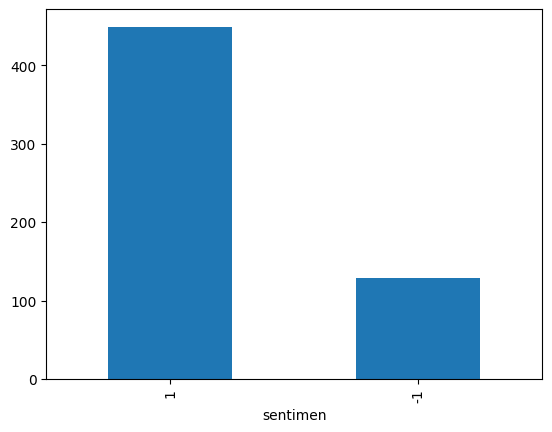

In [13]:
# Let’s have a glimpse at label-distribution in the dataset.
df["sentimen"].value_counts().plot(kind='bar');

In [14]:
df["sentimen"].value_counts() #perbandingan jumlah data di setiap kelas

sentimen
 1    449
-1    129
Name: count, dtype: int64

In [15]:
df["sentimen"].value_counts(normalize=True)

sentimen
 1    0.776817
-1    0.223183
Name: proportion, dtype: float64

### Text Pre-processing

### 1. Cleansing

In [16]:
#untuk menghilangkan tanda baca, angka, karakter spesial, emotikon, spasi double dll.
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt
def remove_tweet_special(text):
    # remove tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # remove non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # remove incomplete URL
    return text.replace("http://", " ").replace("https://", " ")
                
df['Tweet'] = df['Tweet'].apply(remove_tweet_special)
#menghapus angka
def remove_number(text):
    return  re.sub(r"\d+", "", text)
df['Tweet'] = df['Tweet'].apply(remove_number)
#menghapus tanda baca
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))
df['Tweet'] = df['Tweet'].apply(remove_punctuation)
#menghapus double spasi
def remove_whitespace_LT(text):
    return text.strip()
df['Tweet'] = df['Tweet'].apply(remove_whitespace_LT)
#remove multiple whitespace into single whitespace
def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)
df['Tweet'] = df['Tweet'].apply(remove_whitespace_multiple)
# remove single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)
df['Tweet'] = df['Tweet'].apply(remove_singl_char)
df['clean'] = np.vectorize(remove_pattern)(df['Tweet'], "@[\w]*") 
df.head(10)

,Tweet,sentimen,clean
0,Menyejukkan luar biasa tapi bagi pembenci Anies Baswedan ini adalah pukulan telak atas mereka yg...,-1,Menyejukkan luar biasa tapi bagi pembenci Anies Baswedan ini adalah pukulan telak atas mereka yg...
1,Repost dari Kebakaran terjadi di Gang Lapo Sona Kelurahan Baringin Kota Sibolga Sumatera Utara,-1,Repost dari Kebakaran terjadi di Gang Lapo Sona Kelurahan Baringin Kota Sibolga Sumatera Utara
2,Kasihan Kadrun yah partai nya sudah mau tahun engga dapet jabatan Menteri makanya kadrun sangat ...,-1,Kasihan Kadrun yah partai nya sudah mau tahun engga dapet jabatan Menteri makanya kadrun sangat ...
3,Repost dari Bantuan gerobak gratis dari Partai Perindo berdampak langsung meningkatkan perekonom...,1,Repost dari Bantuan gerobak gratis dari Partai Perindo berdampak langsung meningkatkan perekonom...
4,wy Pemimpin Muda Inovatif dan Kreatif di dukung penuh generasi milenial Pemimpin muda yang punya...,1,wy Pemimpin Muda Inovatif dan Kreatif di dukung penuh generasi milenial Pemimpin muda yang punya...
5,Simpatisan Jokowi di Ponorogo mendeklarasikan dukungan untuk Prabowo Subianto pada Pilpres Gerin...,1,Simpatisan Jokowi di Ponorogo mendeklarasikan dukungan untuk Prabowo Subianto pada Pilpres Gerin...
6,Dulu WORLD surveyjika pilpres dilakukan sekarang maka pemenangnyaAnies Baswedan Itu dulu bbrp bu...,1,Dulu WORLD surveyjika pilpres dilakukan sekarang maka pemenangnyaAnies Baswedan Itu dulu bbrp bu...
7,Mahkamah Konstitusi Jadi Wasit yang Adil Tangani Sengketa Pemilu Kami sangat berharap MK melakuk...,1,Mahkamah Konstitusi Jadi Wasit yang Adil Tangani Sengketa Pemilu Kami sangat berharap MK melakuk...
8,Bersama Berkolaborasi dan Bersinergi untuk Memenangkan Ganjar Pranowo dalam Pilpres,1,Bersama Berkolaborasi dan Bersinergi untuk Memenangkan Ganjar Pranowo dalam Pilpres
9,PKB Pingit Cak Imin untuk Setop Bicara soal Pilpres,-1,PKB Pingit Cak Imin untuk Setop Bicara soal Pilpres


In [17]:
df = df.drop(columns= ['Tweet'])
# df.to_csv("clean_text_adi.csv")

### CASE FOLDING

In [18]:
#untuk merubah huruf kapital menjadi huruf kecil
def to_lower(text):
        return text.lower() 

In [19]:
df['case_folding']=df['clean'].apply(to_lower)
df.head(10)

,sentimen,clean,case_folding
0,-1,Menyejukkan luar biasa tapi bagi pembenci Anies Baswedan ini adalah pukulan telak atas mereka yg...,menyejukkan luar biasa tapi bagi pembenci anies baswedan ini adalah pukulan telak atas mereka yg...
1,-1,Repost dari Kebakaran terjadi di Gang Lapo Sona Kelurahan Baringin Kota Sibolga Sumatera Utara,repost dari kebakaran terjadi di gang lapo sona kelurahan baringin kota sibolga sumatera utara
2,-1,Kasihan Kadrun yah partai nya sudah mau tahun engga dapet jabatan Menteri makanya kadrun sangat ...,kasihan kadrun yah partai nya sudah mau tahun engga dapet jabatan menteri makanya kadrun sangat ...
3,1,Repost dari Bantuan gerobak gratis dari Partai Perindo berdampak langsung meningkatkan perekonom...,repost dari bantuan gerobak gratis dari partai perindo berdampak langsung meningkatkan perekonom...
4,1,wy Pemimpin Muda Inovatif dan Kreatif di dukung penuh generasi milenial Pemimpin muda yang punya...,wy pemimpin muda inovatif dan kreatif di dukung penuh generasi milenial pemimpin muda yang punya...
5,1,Simpatisan Jokowi di Ponorogo mendeklarasikan dukungan untuk Prabowo Subianto pada Pilpres Gerin...,simpatisan jokowi di ponorogo mendeklarasikan dukungan untuk prabowo subianto pada pilpres gerin...
6,1,Dulu WORLD surveyjika pilpres dilakukan sekarang maka pemenangnyaAnies Baswedan Itu dulu bbrp bu...,dulu world surveyjika pilpres dilakukan sekarang maka pemenangnyaanies baswedan itu dulu bbrp bu...
7,1,Mahkamah Konstitusi Jadi Wasit yang Adil Tangani Sengketa Pemilu Kami sangat berharap MK melakuk...,mahkamah konstitusi jadi wasit yang adil tangani sengketa pemilu kami sangat berharap mk melakuk...
8,1,Bersama Berkolaborasi dan Bersinergi untuk Memenangkan Ganjar Pranowo dalam Pilpres,bersama berkolaborasi dan bersinergi untuk memenangkan ganjar pranowo dalam pilpres
9,-1,PKB Pingit Cak Imin untuk Setop Bicara soal Pilpres,pkb pingit cak imin untuk setop bicara soal pilpres


In [20]:
# df = df.drop(columns= ['tidy_text'])

In [21]:
df.to_csv("cfold_text_adi.csv")

In [22]:
df.head(10)

,sentimen,clean,case_folding
0,-1,Menyejukkan luar biasa tapi bagi pembenci Anies Baswedan ini adalah pukulan telak atas mereka yg...,menyejukkan luar biasa tapi bagi pembenci anies baswedan ini adalah pukulan telak atas mereka yg...
1,-1,Repost dari Kebakaran terjadi di Gang Lapo Sona Kelurahan Baringin Kota Sibolga Sumatera Utara,repost dari kebakaran terjadi di gang lapo sona kelurahan baringin kota sibolga sumatera utara
2,-1,Kasihan Kadrun yah partai nya sudah mau tahun engga dapet jabatan Menteri makanya kadrun sangat ...,kasihan kadrun yah partai nya sudah mau tahun engga dapet jabatan menteri makanya kadrun sangat ...
3,1,Repost dari Bantuan gerobak gratis dari Partai Perindo berdampak langsung meningkatkan perekonom...,repost dari bantuan gerobak gratis dari partai perindo berdampak langsung meningkatkan perekonom...
4,1,wy Pemimpin Muda Inovatif dan Kreatif di dukung penuh generasi milenial Pemimpin muda yang punya...,wy pemimpin muda inovatif dan kreatif di dukung penuh generasi milenial pemimpin muda yang punya...
5,1,Simpatisan Jokowi di Ponorogo mendeklarasikan dukungan untuk Prabowo Subianto pada Pilpres Gerin...,simpatisan jokowi di ponorogo mendeklarasikan dukungan untuk prabowo subianto pada pilpres gerin...
6,1,Dulu WORLD surveyjika pilpres dilakukan sekarang maka pemenangnyaAnies Baswedan Itu dulu bbrp bu...,dulu world surveyjika pilpres dilakukan sekarang maka pemenangnyaanies baswedan itu dulu bbrp bu...
7,1,Mahkamah Konstitusi Jadi Wasit yang Adil Tangani Sengketa Pemilu Kami sangat berharap MK melakuk...,mahkamah konstitusi jadi wasit yang adil tangani sengketa pemilu kami sangat berharap mk melakuk...
8,1,Bersama Berkolaborasi dan Bersinergi untuk Memenangkan Ganjar Pranowo dalam Pilpres,bersama berkolaborasi dan bersinergi untuk memenangkan ganjar pranowo dalam pilpres
9,-1,PKB Pingit Cak Imin untuk Setop Bicara soal Pilpres,pkb pingit cak imin untuk setop bicara soal pilpres


### Tokenizing

In [23]:
from nltk.tokenize import RegexpTokenizer

regexp = RegexpTokenizer(r'\w+|$[0-9]+|\S+')
df['Token'] = df['case_folding'].apply(regexp.tokenize)


In [24]:
df.head(10)

,sentimen,clean,case_folding,Token
0,-1,Menyejukkan luar biasa tapi bagi pembenci Anies Baswedan ini adalah pukulan telak atas mereka yg...,menyejukkan luar biasa tapi bagi pembenci anies baswedan ini adalah pukulan telak atas mereka yg...,"[menyejukkan, luar, biasa, tapi, bagi, pembenci, anies, baswedan, ini, adalah, pukulan, telak, a..."
1,-1,Repost dari Kebakaran terjadi di Gang Lapo Sona Kelurahan Baringin Kota Sibolga Sumatera Utara,repost dari kebakaran terjadi di gang lapo sona kelurahan baringin kota sibolga sumatera utara,"[repost, dari, kebakaran, terjadi, di, gang, lapo, sona, kelurahan, baringin, kota, sibolga, sum..."
2,-1,Kasihan Kadrun yah partai nya sudah mau tahun engga dapet jabatan Menteri makanya kadrun sangat ...,kasihan kadrun yah partai nya sudah mau tahun engga dapet jabatan menteri makanya kadrun sangat ...,"[kasihan, kadrun, yah, partai, nya, sudah, mau, tahun, engga, dapet, jabatan, menteri, makanya, ..."
3,1,Repost dari Bantuan gerobak gratis dari Partai Perindo berdampak langsung meningkatkan perekonom...,repost dari bantuan gerobak gratis dari partai perindo berdampak langsung meningkatkan perekonom...,"[repost, dari, bantuan, gerobak, gratis, dari, partai, perindo, berdampak, langsung, meningkatka..."
4,1,wy Pemimpin Muda Inovatif dan Kreatif di dukung penuh generasi milenial Pemimpin muda yang punya...,wy pemimpin muda inovatif dan kreatif di dukung penuh generasi milenial pemimpin muda yang punya...,"[wy, pemimpin, muda, inovatif, dan, kreatif, di, dukung, penuh, generasi, milenial, pemimpin, mu..."
5,1,Simpatisan Jokowi di Ponorogo mendeklarasikan dukungan untuk Prabowo Subianto pada Pilpres Gerin...,simpatisan jokowi di ponorogo mendeklarasikan dukungan untuk prabowo subianto pada pilpres gerin...,"[simpatisan, jokowi, di, ponorogo, mendeklarasikan, dukungan, untuk, prabowo, subianto, pada, pi..."
6,1,Dulu WORLD surveyjika pilpres dilakukan sekarang maka pemenangnyaAnies Baswedan Itu dulu bbrp bu...,dulu world surveyjika pilpres dilakukan sekarang maka pemenangnyaanies baswedan itu dulu bbrp bu...,"[dulu, world, surveyjika, pilpres, dilakukan, sekarang, maka, pemenangnyaanies, baswedan, itu, d..."
7,1,Mahkamah Konstitusi Jadi Wasit yang Adil Tangani Sengketa Pemilu Kami sangat berharap MK melakuk...,mahkamah konstitusi jadi wasit yang adil tangani sengketa pemilu kami sangat berharap mk melakuk...,"[mahkamah, konstitusi, jadi, wasit, yang, adil, tangani, sengketa, pemilu, kami, sangat, berhara..."
8,1,Bersama Berkolaborasi dan Bersinergi untuk Memenangkan Ganjar Pranowo dalam Pilpres,bersama berkolaborasi dan bersinergi untuk memenangkan ganjar pranowo dalam pilpres,"[bersama, berkolaborasi, dan, bersinergi, untuk, memenangkan, ganjar, pranowo, dalam, pilpres]"
9,-1,PKB Pingit Cak Imin untuk Setop Bicara soal Pilpres,pkb pingit cak imin untuk setop bicara soal pilpres,"[pkb, pingit, cak, imin, untuk, setop, bicara, soal, pilpres]"


In [25]:
# df.to_csv("Tokenizing_jaya.csv")

### STOPWORDS REMOVAL

In [26]:
# Pastikan kolom 'tidy_text' hanya berisi string
df['Token'] = df['Token'].astype(str)

# Filter elemen yang benar-benar string
df['stopword'] = df['Token'].apply(lambda x: ' '.join([w for w in x.split() if isinstance(w, str) and len(w) > 3]))

In [27]:
df.head(10)

,sentimen,clean,case_folding,Token,stopword
0,-1,Menyejukkan luar biasa tapi bagi pembenci Anies Baswedan ini adalah pukulan telak atas mereka yg...,menyejukkan luar biasa tapi bagi pembenci anies baswedan ini adalah pukulan telak atas mereka yg...,"['menyejukkan', 'luar', 'biasa', 'tapi', 'bagi', 'pembenci', 'anies', 'baswedan', 'ini', 'adalah...","['menyejukkan', 'luar', 'biasa', 'tapi', 'bagi', 'pembenci', 'anies', 'baswedan', 'ini', 'adalah..."
1,-1,Repost dari Kebakaran terjadi di Gang Lapo Sona Kelurahan Baringin Kota Sibolga Sumatera Utara,repost dari kebakaran terjadi di gang lapo sona kelurahan baringin kota sibolga sumatera utara,"['repost', 'dari', 'kebakaran', 'terjadi', 'di', 'gang', 'lapo', 'sona', 'kelurahan', 'baringin'...","['repost', 'dari', 'kebakaran', 'terjadi', 'di', 'gang', 'lapo', 'sona', 'kelurahan', 'baringin'..."
2,-1,Kasihan Kadrun yah partai nya sudah mau tahun engga dapet jabatan Menteri makanya kadrun sangat ...,kasihan kadrun yah partai nya sudah mau tahun engga dapet jabatan menteri makanya kadrun sangat ...,"['kasihan', 'kadrun', 'yah', 'partai', 'nya', 'sudah', 'mau', 'tahun', 'engga', 'dapet', 'jabata...","['kasihan', 'kadrun', 'yah', 'partai', 'nya', 'sudah', 'mau', 'tahun', 'engga', 'dapet', 'jabata..."
3,1,Repost dari Bantuan gerobak gratis dari Partai Perindo berdampak langsung meningkatkan perekonom...,repost dari bantuan gerobak gratis dari partai perindo berdampak langsung meningkatkan perekonom...,"['repost', 'dari', 'bantuan', 'gerobak', 'gratis', 'dari', 'partai', 'perindo', 'berdampak', 'la...","['repost', 'dari', 'bantuan', 'gerobak', 'gratis', 'dari', 'partai', 'perindo', 'berdampak', 'la..."
4,1,wy Pemimpin Muda Inovatif dan Kreatif di dukung penuh generasi milenial Pemimpin muda yang punya...,wy pemimpin muda inovatif dan kreatif di dukung penuh generasi milenial pemimpin muda yang punya...,"['wy', 'pemimpin', 'muda', 'inovatif', 'dan', 'kreatif', 'di', 'dukung', 'penuh', 'generasi', 'm...","['wy', 'pemimpin', 'muda', 'inovatif', 'dan', 'kreatif', 'di', 'dukung', 'penuh', 'generasi', 'm..."
5,1,Simpatisan Jokowi di Ponorogo mendeklarasikan dukungan untuk Prabowo Subianto pada Pilpres Gerin...,simpatisan jokowi di ponorogo mendeklarasikan dukungan untuk prabowo subianto pada pilpres gerin...,"['simpatisan', 'jokowi', 'di', 'ponorogo', 'mendeklarasikan', 'dukungan', 'untuk', 'prabowo', 's...","['simpatisan', 'jokowi', 'di', 'ponorogo', 'mendeklarasikan', 'dukungan', 'untuk', 'prabowo', 's..."
6,1,Dulu WORLD surveyjika pilpres dilakukan sekarang maka pemenangnyaAnies Baswedan Itu dulu bbrp bu...,dulu world surveyjika pilpres dilakukan sekarang maka pemenangnyaanies baswedan itu dulu bbrp bu...,"['dulu', 'world', 'surveyjika', 'pilpres', 'dilakukan', 'sekarang', 'maka', 'pemenangnyaanies', ...","['dulu', 'world', 'surveyjika', 'pilpres', 'dilakukan', 'sekarang', 'maka', 'pemenangnyaanies', ..."
7,1,Mahkamah Konstitusi Jadi Wasit yang Adil Tangani Sengketa Pemilu Kami sangat berharap MK melakuk...,mahkamah konstitusi jadi wasit yang adil tangani sengketa pemilu kami sangat berharap mk melakuk...,"['mahkamah', 'konstitusi', 'jadi', 'wasit', 'yang', 'adil', 'tangani', 'sengketa', 'pemilu', 'ka...","['mahkamah', 'konstitusi', 'jadi', 'wasit', 'yang', 'adil', 'tangani', 'sengketa', 'pemilu', 'ka..."
8,1,Bersama Berkolaborasi dan Bersinergi untuk Memenangkan Ganjar Pranowo dalam Pilpres,bersama berkolaborasi dan bersinergi untuk memenangkan ganjar pranowo dalam pilpres,"['bersama', 'berkolaborasi', 'dan', 'bersinergi', 'untuk', 'memenangkan', 'ganjar', 'pranowo', '...","['bersama', 'berkolaborasi', 'dan', 'bersinergi', 'untuk', 'memenangkan', 'ganjar', 'pranowo', '..."
9,-1,PKB Pingit Cak Imin untuk Setop Bicara soal Pilpres,pkb pingit cak imin untuk setop bicara soal pilpres,"['pkb', 'pingit', 'cak', 'imin', 'untuk', 'setop', 'bicara', 'soal', 'pilpres']","['pkb', 'pingit', 'cak', 'imin', 'untuk', 'setop', 'bicara', 'soal', 'pilpres']"


In [28]:
#set stopwords to indonesia
factory = StopWordRemoverFactory()
stop= factory.get_stop_words()
print(stop)

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

In [29]:
# df.to_csv("stopword_jaya.csv")

### Stemming

In [30]:
#Stemming the text
factory = StemmerFactory()
ps = factory.create_stemmer()

def simple_stemmer(text):
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text

In [31]:
#Apply function on text column
df['stemmed']=df['stopword'].apply(simple_stemmer)
df.head(10)

,sentimen,clean,case_folding,Token,stopword,stemmed
0,-1,Menyejukkan luar biasa tapi bagi pembenci Anies Baswedan ini adalah pukulan telak atas mereka yg...,menyejukkan luar biasa tapi bagi pembenci anies baswedan ini adalah pukulan telak atas mereka yg...,"['menyejukkan', 'luar', 'biasa', 'tapi', 'bagi', 'pembenci', 'anies', 'baswedan', 'ini', 'adalah...","['menyejukkan', 'luar', 'biasa', 'tapi', 'bagi', 'pembenci', 'anies', 'baswedan', 'ini', 'adalah...",sejuk luar biasa tapi bagi benci anies baswedan ini adalah pukul telak atas mereka yg ingin jega...
1,-1,Repost dari Kebakaran terjadi di Gang Lapo Sona Kelurahan Baringin Kota Sibolga Sumatera Utara,repost dari kebakaran terjadi di gang lapo sona kelurahan baringin kota sibolga sumatera utara,"['repost', 'dari', 'kebakaran', 'terjadi', 'di', 'gang', 'lapo', 'sona', 'kelurahan', 'baringin'...","['repost', 'dari', 'kebakaran', 'terjadi', 'di', 'gang', 'lapo', 'sona', 'kelurahan', 'baringin'...",repost dari bakar jadi di gang lapo sona lurah baringin kota sibolga sumatera utara
2,-1,Kasihan Kadrun yah partai nya sudah mau tahun engga dapet jabatan Menteri makanya kadrun sangat ...,kasihan kadrun yah partai nya sudah mau tahun engga dapet jabatan menteri makanya kadrun sangat ...,"['kasihan', 'kadrun', 'yah', 'partai', 'nya', 'sudah', 'mau', 'tahun', 'engga', 'dapet', 'jabata...","['kasihan', 'kadrun', 'yah', 'partai', 'nya', 'sudah', 'mau', 'tahun', 'engga', 'dapet', 'jabata...",kasihan kadrun yah partai nya sudah mau tahun engga dapet jabat menteri makanya kadrun sangat me...
3,1,Repost dari Bantuan gerobak gratis dari Partai Perindo berdampak langsung meningkatkan perekonom...,repost dari bantuan gerobak gratis dari partai perindo berdampak langsung meningkatkan perekonom...,"['repost', 'dari', 'bantuan', 'gerobak', 'gratis', 'dari', 'partai', 'perindo', 'berdampak', 'la...","['repost', 'dari', 'bantuan', 'gerobak', 'gratis', 'dari', 'partai', 'perindo', 'berdampak', 'la...",repost dari bantu gerobak gratis dari partai perindo dampak langsung tingkat ekonomi warga
4,1,wy Pemimpin Muda Inovatif dan Kreatif di dukung penuh generasi milenial Pemimpin muda yang punya...,wy pemimpin muda inovatif dan kreatif di dukung penuh generasi milenial pemimpin muda yang punya...,"['wy', 'pemimpin', 'muda', 'inovatif', 'dan', 'kreatif', 'di', 'dukung', 'penuh', 'generasi', 'm...","['wy', 'pemimpin', 'muda', 'inovatif', 'dan', 'kreatif', 'di', 'dukung', 'penuh', 'generasi', 'm...",wy pimpin muda inovatif dan kreatif di dukung penuh generasi milenial pimpin muda yang punya ban...
5,1,Simpatisan Jokowi di Ponorogo mendeklarasikan dukungan untuk Prabowo Subianto pada Pilpres Gerin...,simpatisan jokowi di ponorogo mendeklarasikan dukungan untuk prabowo subianto pada pilpres gerin...,"['simpatisan', 'jokowi', 'di', 'ponorogo', 'mendeklarasikan', 'dukungan', 'untuk', 'prabowo', 's...","['simpatisan', 'jokowi', 'di', 'ponorogo', 'mendeklarasikan', 'dukungan', 'untuk', 'prabowo', 's...",simpatisan jokowi di ponorogo deklarasi dukung untuk prabowo subianto pada pilpres gerindra yaki...
6,1,Dulu WORLD surveyjika pilpres dilakukan sekarang maka pemenangnyaAnies Baswedan Itu dulu bbrp bu...,dulu world surveyjika pilpres dilakukan sekarang maka pemenangnyaanies baswedan itu dulu bbrp bu...,"['dulu', 'world', 'surveyjika', 'pilpres', 'dilakukan', 'sekarang', 'maka', 'pemenangnyaanies', ...","['dulu', 'world', 'surveyjika', 'pilpres', 'dilakukan', 'sekarang', 'maka', 'pemenangnyaanies', ...",dulu world surveyjika pilpres laku sekarang maka pemenangnyaanies baswedan itu dulu bbrp bulan y...
7,1,Mahkamah Konstitusi Jadi Wasit yang Adil Tangani Sengketa Pemilu Kami sangat berharap MK melakuk...,mahkamah konstitusi jadi wasit yang adil tangani sengketa pemilu kami sangat berharap mk melakuk...,"['mahkamah', 'konstitusi', 'jadi', 'wasit', 'yang', 'adil', 'tangani', 'sengketa', 'pemilu', 'ka...","['mahkamah', 'konstitusi', 'jadi', 'wasit', 'yang', 'adil', 'tangani', 'sengketa', 'pemilu', 'ka...",mahkamah konstit

In [32]:
# columns_to_drop = ['cleaned', 'Token',]
# df.drop(columns=columns_to_drop, inplace=True)

### pembobotan Tf-Idf

In [33]:
#Proses TF-IDF Full
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer


tvec = CountVectorizer()
X_cVec = tvec.fit_transform(df['stemmed'].values.astype('U'))
print (X_cVec)


h_tfidf = TfidfTransformer()
x_tfidf = h_tfidf.fit_transform(X_cVec)
print(x_tfidf)


X = df.stemmed
Y = df.sentimen


  (0, 1577)	1
  (0, 999)	1
  (0, 223)	1
  (0, 1757)	1
  (0, 133)	1
  (0, 191)	1
  (0, 81)	3
  (0, 170)	2
  (0, 679)	2
  (0, 9)	1
  (0, 1435)	1
  (0, 1773)	1
  (0, 110)	1
  (0, 1104)	1
  (0, 1942)	1
  (0, 678)	1
  (0, 733)	1
  (0, 1019)	1
  (0, 403)	2
  (0, 1362)	1
  (0, 686)	1
  (0, 1267)	1
  (0, 789)	1
  (0, 1458)	1
  (0, 285)	1
  :	:
  (577, 37)	1
  (577, 1808)	1
  (577, 731)	1
  (577, 1232)	1
  (577, 90)	1
  (577, 1068)	1
  (577, 726)	1
  (577, 1498)	1
  (577, 318)	1
  (577, 977)	1
  (577, 1590)	1
  (577, 175)	1
  (577, 1189)	1
  (577, 1617)	1
  (577, 1559)	1
  (577, 525)	1
  (577, 1694)	1
  (577, 242)	1
  (577, 1135)	1
  (577, 860)	1
  (577, 1063)	1
  (577, 1669)	1
  (577, 805)	1
  (577, 1690)	1
  (577, 1624)	1
  (0, 1942)	0.1077295160694058
  (0, 1878)	0.09756334843858333
  (0, 1866)	0.1463519584348287
  (0, 1773)	0.1811836686134829
  (0, 1757)	0.1494001061442129
  (0, 1577)	0.1811836686134829
  (0, 1528)	0.17286084061003382
  (0, 1472)	0.19291403584639336
  (0, 1458)	0.1293469109

In [34]:
# Ubah hasil output menjadi DataFrame
data_output = pd.DataFrame(x_tfidf.toarray(), columns=tvec.get_feature_names_out())

In [35]:
# Gabungkan DataFrame output dengan data asli (jika diperlukan)
# data = pd.concat([data, df_output], axis=1)

In [36]:
# Simpan DataFrame hasil output ke dalam file CSV
# data_output.to_csv('hasil_output_jaya.csv', index=False)

In [41]:
X_array = x_tfidf.toarray()

In [42]:
X = X_array
y = df.sentimen

## Klasifikasi Naive Bayes 80:20

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

[[18  9]
 [17 72]]
akurasi 0.7758620689655172
presisi 0.8888888888888888
recall 0.8089887640449438


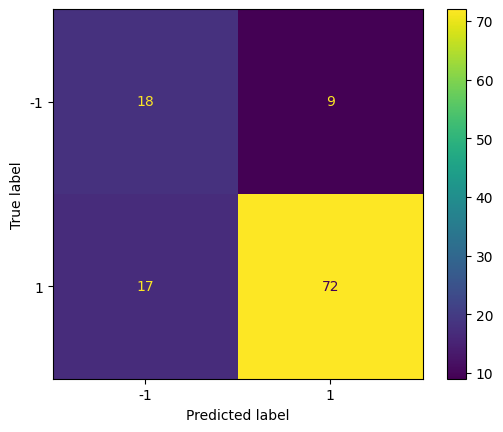

In [44]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


# Create a Gaussian Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions for the test data
y_pred = model.predict(X_test)

# Calculate the confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print(confusion_matrix)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

print("akurasi", acc)
print("presisi", prec)
print("recall", rec)


# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix, display_labels=model.classes_)
disp.plot()
plt.show()

## Klasifikasi Naive Bayes 50:50

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

[[ 39  27]
 [ 28 195]]
akurasi 0.8096885813148789
presisi 0.8783783783783784
recall 0.874439461883408


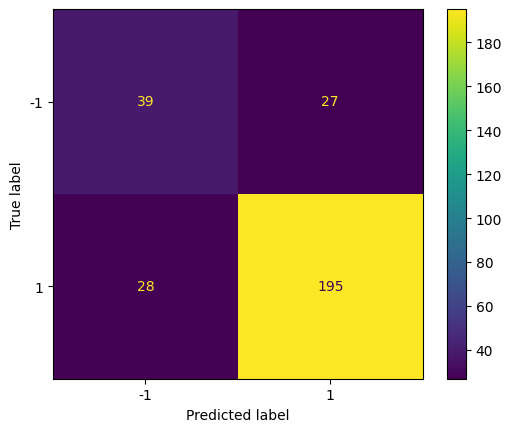

In [51]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


# Create a Gaussian Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions for the test data
y_pred = model.predict(X_test)

# Calculate the confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print(confusion_matrix)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

print("akurasi", acc)
print("presisi", prec)
print("recall", rec)


# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix, display_labels=model.classes_)
disp.plot()
plt.show()

## Klasifikasi Naive Bayes 30:70

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

[[ 38  57]
 [ 21 289]]
akurasi 0.8074074074074075
presisi 0.8352601156069365
recall 0.932258064516129


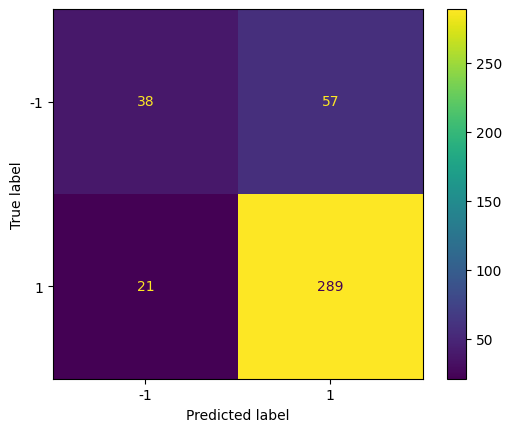

In [47]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


# Create a Gaussian Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions for the test data
y_pred = model.predict(X_test)

# Calculate the confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print(confusion_matrix)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

print("akurasi", acc)
print("presisi", prec)
print("recall", rec)


# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix, display_labels=model.classes_)
disp.plot()
plt.show()